# Devoir en temps libre N°3
# Algorithme de Huffman

<div class="alert alert-warning" role="alert">
    
## Partie A : Question 2
    
## Algorithme de conversion
</div>

On modélise le tableau de codage par un dictionnaire où les clés sont les caractères et les valeurs le codage binaire associé sous forme de chaîne de caractères.
Le tableau de la question 1 du sujet papier est modélisé par le dictionnaire suivant :

    {'a':'0011','c':'0100','e':'100','i': '11','l':'0010','n':'101','p':'0101','s':'011','t':'0001',' ':'0000'}

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Conversion texte en binaire : </strong>

Compléter le code de la fonction `compression` qui :
    
- prend en paramètres un texte et un dictionnaire donnant la table de codage ;
- renvoie le codage binaire du texte saisi en paramètre en utilisant le tableau de codage représenté par le dictionnaire saisi en paramètre.
</div>

In [11]:
def compression(texte, dico):
    pass

In [12]:
# test fonction compression
dico_codage = {' ':'0000','t':'0001','l':'0010','a':'0011','c':'0100','p':'0101','s':'011','e':'100','n':'101','i': '11'}
assert compression('specialite nsi', dico_codage) == '011010110001001100110010110001100000010101111'

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Calcul du taux de compression : </strong>

Compléter le code de la fonction `taux_compression` qui prend les mêmes paramètres que la fonction `compression` et qui renvoie le taux de compression du codage par rapport au codage ASCII.
</div>

In [13]:
def taux_compression(texte, dico):
    pass

In [14]:
# test de la fonction taux_compression
assert taux_compression('specialite nsi', dico_codage) == 59.82142857142857

<div class="alert alert-block alert-danger">
    
**Laisser de coté ce Notebook et reprendre le sujet papier pour poursuivre le devoir.**
    
</div>

<div class="alert alert-warning" role="alert">
    
## Partie C :
    
## Implémentation de l'algorithme de Huffman
</div>

<div class="alert alert-block alert-danger">
    
**Ne pas oublier d'exécuter la cellule ci-dessous pour charger la bibliothèque graphviz.**
    
</div>

In [49]:
# import pour affichage des arbres
from graphviz import Digraph

### 1. Nombre d'occurence d'un caractère dans un texte

L'algorithme de Huffman est basé dans un premier temps par la détermination du nombre d'occurrences de chacun des caractères d'un texte.

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Question 1 </strong>
    
Compléter la fonction `compte_occurrence` qui :
- prend en paramètre un `texte` de type `str` ;
- renvoie un dictionnaire `dico` dont les clés sont les caractères du texte et les valeurs sont les nombres d'occurrences 
    de chaque caractère dans le texte.
</div>

In [52]:
def compte_occurrence(texte):
    """
    return : dico -  dictionnaire dont les clés sont les caractères 
    du texte et les valeurs sont les nombres d'occurrences de chaque caractère du texte passé en paramètre.
    """
    pass

In [53]:
# tests
assert compte_occurrence("DABBCDD") == {'A': 1, 'B': 2, 'C': 1, 'D': 3}
assert compte_occurrence("spe nsi") == {'s': 2, 'p': 1, 'e': 1, 'n': 1, 'i': 1, ' ': 1}

### 2. Implémentation de classe la `ArbreHuffman`

On décide de modéliser les arbres de Huffman avec la classe `ArbreHuffman` donnée ci-dessous. 
Un objet de la classe `ArbreHuffman` aura pour attributs :

- `lettre` : caractère dont on souhaite déterminer le codage de Huffman
- `nombre_occurrence` : nombre de d'occurrences d'un caractère que l'on souhaite coder.
- `gauche` : sous-arbre gauche
- `droit` : sous-arbre droit

In [38]:
class ArbreHuffman:
    def __init__(self, lettre, nb_occ, gauche = None, droit=None):
        """
        param: lettre - str
        param: nb_occ - int
        """
        self.lettre = lettre
        self.nombre_occurrence = nb_occ
        self.gauche = gauche
        self.droit = droit
        
    def est_feuille(self):
        pass
 
        
    def __str__(self):
        if self.lettre :
            return "{} | {}".format(self.lettre,self.nombre_occurrence)
        else:
            return "{}".format(self.nombre_occurrence)
        
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self, aretes)
        dot.edges(aretes)
        return dot

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Question 2 </strong>
    
Dans la classe `ArbreHuffman`, compléter la méthode `est_feuille` qui :
- prend en paramètre un objet de type `ArbreHuffman` ; 
- retourne `True` si cette arbre est une feuille et `False` sinon.
</div>

In [ ]:
# Exécuter cette cellule et prendre le temps de comprendre les différentes lignes.

# Exemples de création d'arbres
arbre1 = ArbreHuffman('a', 4)
arbre2 = ArbreHuffman('b', 10)
arbre3 = ArbreHuffman(None, 14, arbre2, arbre1)

# Tests de la méthode est_feuille
assert arbre1.est_feuille()
assert arbre2.est_feuille()
assert not arbre3.est_feuille()

# exemple d'affichages
print(arbre1)
print(arbre2)
print(arbre3)
arbre3.show()


### 3. Création d'un arbre de Huffman

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Question 3 </strong>
    
Compléter la fonction `construit_liste_arbres` qui :
- prend en paramètre un `texte` de type `str` ;
- renvoie une liste d'arbres de Huffman, chacun arbre est réduit à une feuille
    constituée de la lettre et de son nombre d'occurrences dans le texte passé en paramètre.
</div>

In [55]:
def construit_liste_arbres(texte):
    """
    return : liste_arbre : liste d'arbres de Huffman, chacun réduit est réduit à une feuille
    constituée de la lettre et de son nombre d'apparition.
    
    """
    liste_arbres = []
    dico = compte_occurrence(texte)
    # A compléter

In [ ]:
# tests d'exécutions

print('Premier exemple')
liste_arbres = construit_liste_arbres("DABBCDD")
for arbre in liste_arbres:
    print(arbre)

print(" ")

print('Deuxième exemple')
liste_arbres = construit_liste_arbres("spe nsi")
for arbre in liste_arbres:
    print(arbre)   

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Question 4 </strong>
    
Dans l'algorithme de Huffman, on est amené à fusionner des arbres de Huffman pour en créer un nouveau dont 

- la racine a pour nombre d'occurrences la somme des nombres d'occurrences des arbres fusionnés ;
- les arbres fusionnés deviennent les sous-arbres droit et gauche de ce nouvel arbre.
    
Compléter la fonction `fusion` qui :
- prend en paramètre 2 arbres de la classe `ArbreHuffman`; 
- retourne un nouvel arbre de la classe ArbreHuffman, dont le nombre d'occurrence est la somme des occurrences des arbres passés en paramètres
    et dont les fils sont les 2 arbres passés en paramètres. La lettre affectée à cet arbre sera `None`
    
</div>

In [75]:
def fusion(gauche, droit):
    """
    param: gauche : arbre de Huffman à fusionner
    param: droit : arbre de Huffman à fusionner
    return: Arbre de Huffamn obtenu par fusion des arbres passés en paramètres
    """
    pass

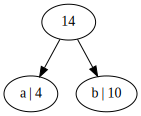

In [76]:
# test de fusion

arbre1 = ArbreHuffman('a', 4)
arbre2 = ArbreHuffman('b', 10)
arbre3 = fusion(arbre1, arbre2)

arbre3.show()

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Question 5 </strong>
    
L'algorithme ci-dessous permet trier la liste des arbres de Huffman par ordre croissant du nombre d'occurrences porté par la racine des arbres.
    
De quel algorithme de tri s'agit-il ?
    
</div>

In [77]:
def tri_liste_arbre_huffman(liste_arbres):
    """
    Tri la liste des arbres par ordre croissant du nombre d'occurrences
    """
    # Tri des arbres en fonction du nombre d'occurences
    for i in range(len(liste_arbres)):
        # Trouver le min
        min = i
        for j in range(i+1, len(liste_arbres)):
            if liste_arbres[min].nombre_occurrence > liste_arbres[j].nombre_occurrence:
                min = j
        liste_arbres[i], liste_arbres[min] = liste_arbres[min], liste_arbres[i]
    return liste_arbres    

**Répondre ici à la question :** *Saisir*

In [ ]:
# Cellule de "tests" de la fonction de tri

print('Premier exemple')
liste_arbres = construit_liste_arbres("DABBCDD")
liste_arbres_triee = tri_liste_arbre_huffman(liste_arbres)
for arbre in liste_arbres_triee:
    print(arbre)
    
print(" ")

print('Deuxième exemple')
liste_arbres = construit_liste_arbres("spe nsi")
liste_arbres_triee = tri_liste_arbre_huffman(liste_arbres)
for arbre in liste_arbres_triee:
    print(arbre)

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Question 6 </strong>
    
1. Compléter la fonction `construit_arbre_huffman` qui :
- prend en paramètre `texte` qui est de type `str`
- retourne l'arbre de Huffman obtenu en suivant l'algorithme de Huffman
    
2. Exécuter cette fonction pour contruire l'arbre de Huffman lié au texte `specialite nsi`.
    
</div>

In [83]:
def construit_arbre_huffman(texte):
    # les 2 instructions suivantes génèrent la liste des arbres de Huffman triés à partir du texte
    liste_arbres = construit_liste_arbres(texte)
    liste_arbres_triee = tri_liste_arbre_huffman(liste_arbres)
    # Tant que les arbres ne sont pas tous funsionnés
    while len(liste_arbres_triee) > 1:
        # Récupère les deux arbres de plus petites occurrences et on les supprime de la liste des arbres
        droit = liste_arbres_triee.pop(0)
        gauche = # à compléter
        # fusion des 2 arbres
        # A compléter
        # inserer le nouvel arbre et trier la liste
        # A compléter
    # Il ne reste plus qu'un seul élément dans la liste des arbres de Huffman
    # On renvoie cet arbre
    return # à compléter

In [ ]:
# Exécution pour répondre à la question 2

# à compléter

### 4. Réalisation du codage de Huffman

On y est presque :) !

Reste maintenant à utiliser l'arbre de Huffman pour déterminer le codage de Huffman c'est à dire le dictionnaire dont les clés sont les caractères de à coder et dont les valeurs sont les codages binaires associés.

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Question 7 </strong>
    
Compléter la fonction **récursive** `parcours` qui détermine le parcours de la racine de l'arbre de Huffman à chacune des feuilles. Cette fonction détermine donc le codage de Huffman de chaque caractère associé à une feuille de l'arbre.
    
Cette fonction :
- prend en paramètres un arbre de la classe `ArbreHuffman`, un chemin qui est une chaine de caractères constituée de 0 et 1, et un dictionnaire.
- renvoie un dictionnaire qui contiendra les caractères et codages des lettres de l'arbre de Huffmann.    
</div>

In [87]:
def parcours(arbre, chemin_en_cours, dico):
    if arbre == None:
        return None
    if arbre.est_feuille():
        dico[arbre.lettre] = # A compléter
    else :
        parcours(arbre.gauche, chemin_en_cours + '0', dico)
        # à compléter
        return dico

In [ ]:
# Exemple d'exécution de la fonction parcours

arbre_Huffman = construit_arbre_huffman("specialite nsi")
print(parcours(arbre_Huffman, '', {}))

### 5. Application

Le code suivant permet charger une fable de De La Fontaine dans une variable fable.

In [ ]:
fichier = open("fable.txt", "r", encoding="UTF-8")
fable = fichier.read()
print(fable)

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Question 8 </strong>
    
Ecrire les instructions permettant de compresser la fable de De La Fontaine selon l'algorithme de Huffman et déterminer le taux de compression.
    
</div>

In [ ]:
# à compléter